In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('uii.csv')

In [58]:
df['content']

0       @AbdFadhil_MR Uii..berdarah siak..sakit ke ken...
1                           @antofilipponi Uii bebesitaaa
2       9 lnA tob4 . aBny'F6ka b9 -xnksj4 6nBbs uii zi...
3       [JADWAL SHALAT SLEMAN]\nKamis 31 Januari 2019\...
4                                     @_wailly Ahhh uii😭😭
                              ...                        
3584            @impcblehibiscus Uad jurusan anjir wkwkwk
3585    🕍 PAVILIUN BARU\n.\n.\n📌 LOKASI\n•Semail Bangu...
3586    Kampus UAD kini punya Lab School di Sambas Kal...
3587    pwmu:  Kunjungi Kalimantan, Rektor Ini Sempatk...
3588             Uad liburnya setahun, tgl 31 des - 6 jan
Name: content, Length: 3589, dtype: object

In [61]:
df['content'].tail().values

array(['@impcblehibiscus Uad jurusan anjir wkwkwk',
       '🕍 PAVILIUN BARU\n.\n.\n📌 LOKASI\n•Semail Bangunharjo Sewon bantul Yogyakarta\n•Dekat pasar, sekolahan, BRI\n•Dekat kampuas UAD, ISI, ATK\n•STKD dll.\n•Cukup 10 Menit Ke Kota Yogya\n.\n💸 HARGA\n•Rp 900.000/Bulan (1 Kamar… https://t.co/SKk4zgvs64',
       'Kampus UAD kini punya Lab School di Sambas Kalbar, salah satu daerah 3T (tertinggal, terluar, terdepan).\n\nPhoto: Pak Rektor UAD https://t.co/ezolB41IDy',
       'pwmu:  Kunjungi Kalimantan, Rektor Ini Sempatkan Motret Gerhana: https://t.co/BQikWdyYDU–Dalam lawatannya ke pedalaman Kalimantan, Rektor Universitas Ahmad Dahlan (UAD) Yogyakarta Dr Muchlas MT berkesempatan memotret gerhana matahari cincin di… https://t.co/8PkymA5FCG https://t.co/5hLjhHVX7y',
       'Uad liburnya setahun, tgl 31 des - 6 jan'], dtype=object)

# Rename Raw Data

In [4]:
df['content'].to_csv('uii-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0              mr uii berdarah siak sakit ke kene langgar
1                                          uii bebesitaaa
2               lna tob abny ka xnksj nbbs uii zif sg aua
3       jadwal shalat sleman kamis januari imsak subuh...
4                                         wailly ahhh uii
                              ...                        
3584                             uad jurusan anjir wkwkwk
3585    paviliun baru lokasi semail bangunharjo sewon ...
3586    kampus uad kini punya lab school di sambas kal...
3587    pwmu kunjungi kalimantan rektor ini sempatkan ...
3588                     uad liburnya setahun tgl des jan
Name: content, Length: 3589, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [77]:
dfcs = dfcs[dfcs.str.contains('uii')]

## Stopwords

In [78]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [79]:
dfcst

0                    mr uii darah siak sakit kene langgar
1                                          uii bebesitaaa
2               lna tob abny ka xnksj nbbs uii zif sg aua
3       jadwal shalat sleman kamis januari imsak subuh...
4                                         wailly ahhh uii
                              ...                        
3514    khuzairi uii susah nak cari member yg perangai...
3519    mister burger gudeg yu djum asli gudeg bu djum...
3552               hukum uad rekomen uii nder emang bagus
3553                                              uii uad
3557                         uii uad uty bener kara rapit
Name: content, Length: 2958, dtype: object

# Rename Cleaned Data

In [80]:
dfcst.to_csv('uii-cleaned.csv')

### TF-IDF Vectorizer

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [82]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [83]:
tfidf.to_csv('tfidf-uii.csv')

### POS-Tagging

In [84]:
from nltk.tag import CRFTagger

In [85]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [86]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [87]:
dfcst_preprocessed

0            [mr, uii, darah, siak, sakit, kene, langgar]
1                                       [uii, bebesitaaa]
2       [lna, tob, abny, ka, xnksj, nbbs, uii, zif, sg...
3       [jadwal, shalat, sleman, kamis, januari, imsak...
4                                     [wailly, ahhh, uii]
                              ...                        
3514    [khuzairi, uii, susah, nak, cari, member, yg, ...
3519    [mister, burger, gudeg, yu, djum, asli, gudeg,...
3552       [hukum, uad, rekomen, uii, nder, emang, bagus]
3553                                           [uii, uad]
3557                  [uii, uad, uty, bener, kara, rapit]
Name: content, Length: 2958, dtype: object

In [88]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [89]:
tag = ct.tag_sents(dfcst_preprocessed)

In [90]:
tag

[[('mr', 'NN'),
  ('uii', 'NN'),
  ('darah', 'NN'),
  ('siak', 'NN'),
  ('sakit', 'FW'),
  ('kene', 'FW'),
  ('langgar', 'FW')],
 [('uii', 'VB'), ('bebesitaaa', 'NN')],
 [('lna', 'NN'),
  ('tob', 'FW'),
  ('abny', 'FW'),
  ('ka', 'FW'),
  ('xnksj', 'FW'),
  ('nbbs', 'FW'),
  ('uii', 'FW'),
  ('zif', 'FW'),
  ('sg', 'FW'),
  ('aua', 'CD')],
 [('jadwal', 'NN'),
  ('shalat', 'NN'),
  ('sleman', 'NN'),
  ('kamis', 'NN'),
  ('januari', 'NN'),
  ('imsak', 'VB'),
  ('subuh', 'VB'),
  ('dhuha', 'NN'),
  ('dzuhur', 'NN'),
  ('ashar', 'NN'),
  ('maghrib', 'NN'),
  ('isya', 'NN'),
  ('sumber', 'NN'),
  ('jama', 'JJ'),
  ('ah', 'VB'),
  ('al', 'NN'),
  ('ghuroba', 'NN'),
  ('fmipa', 'NN'),
  ('uii', 'VB')],
 [('wailly', 'FW'), ('ahhh', 'FW'), ('uii', 'FW')],
 [('uii', 'NN'), ('uii', 'VB')],
 [('uii', 'VB'), ('bournemouth', 'NN'), ('kenduri', 'VB')],
 [('ichigoichie', 'IN'), ('baca', 'NN'), ('tuh', 'JJ'), ('uii', 'VB')],
 [('uii', 'VB'), ('gata', 'NN')],
 [('dah', 'NN'), ('knape', 'NN'), ('uii', 'V

In [91]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [92]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [93]:
df_tagger

,Word,POS
0,mr,NN
1,uii,NN
2,darah,NN
3,siak,NN
4,sakit,FW
...,...,...
26608,uad,FW
26609,uty,FW
26610,bener,FW
26611,kara,NN


# Rename POS Tagger

In [94]:
df_tagger.to_csv('uii-tagger.csv')

### Merge Dataset

In [95]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [96]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

# Rename Weighted Tag

In [97]:
weighted_tag.to_csv('weighted_tag-uii.csv')

In [98]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

# Rename POS Tag

In [99]:
pos_tag.to_csv('pos_tag-uii.csv')

### bi-gram

In [100]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(uii, uii)                 235
(badminton, kaskus)         90
(id, ligamahasiswa)         90
(regu, putra)               90
(ligamahasiswa, kaskus)     89
                          ... 
(ni, amacam)                 1
(uii, paksa)                 1
(uii, syarq)                 1
(uii, ip)                    1
(lamo, dok)                  1
Length: 20309, dtype: int64

In [101]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [102]:
bigram_df

,index,bigram
0,"(uii, uii)",235
1,"(badminton, kaskus)",90
2,"(id, ligamahasiswa)",90
3,"(regu, putra)",90
4,"(ligamahasiswa, kaskus)",89
5,"(cjyc, season)",87
6,"(season, id)",87
7,"(kaskus, cjyc)",87
8,"(court, regu)",76
9,"(skor, badminton)",75


In [103]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [104]:
d

[{('uii', 'uii'): 235,
  ('badminton', 'kaskus'): 90,
  ('id', 'ligamahasiswa'): 90,
  ('regu', 'putra'): 90,
  ('ligamahasiswa', 'kaskus'): 89,
  ('cjyc', 'season'): 87,
  ('season', 'id'): 87,
  ('kaskus', 'cjyc'): 87,
  ('court', 'regu'): 76,
  ('skor', 'badminton'): 75,
  ('game', 'skor'): 59,
  ('uii', 'vs'): 55,
  ('fh', 'uii'): 52,
  ('putra', 'ms'): 51,
  ('anak', 'uii'): 46,
  ('kaskus', 'court'): 45,
  ('ui', 'uii'): 45,
  ('moga', 'allah'): 38,
  ('kampus', 'uii'): 37,
  ('ni', 'uii'): 36}]

In [105]:
import networkx as nx

In [106]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uii",weight=100)

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

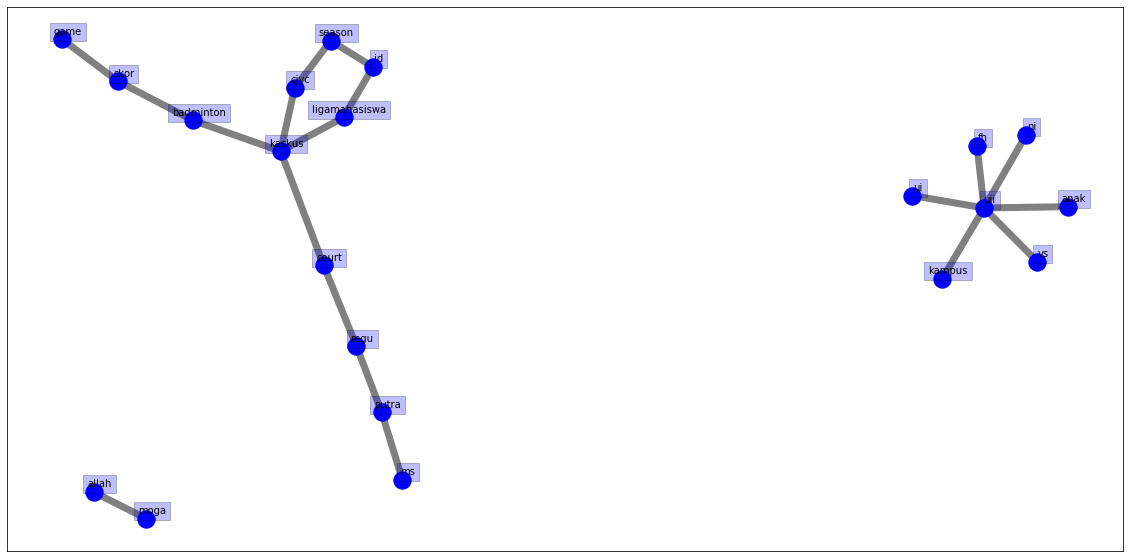

In [108]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [109]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(id, ligamahasiswa, kaskus)    89
(badminton, kaskus, cjyc)      87
(season, id, ligamahasiswa)    87
(cjyc, season, id)             87
(kaskus, cjyc, season)         87
                               ..
(tgk, avengers, skli)           1
(queen, uii, danke)             1
(kecik, centre, tari)           1
(part, me, too)                 1
(charlie, ugm, uny)             1
Length: 23389, dtype: int64

In [125]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(30)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [126]:
trigram_df

,index,trigram
0,"(id, ligamahasiswa, kaskus)",89
1,"(badminton, kaskus, cjyc)",87
2,"(season, id, ligamahasiswa)",87
3,"(cjyc, season, id)",87
4,"(kaskus, cjyc, season)",87
5,"(court, regu, putra)",76
6,"(skor, badminton, kaskus)",75
7,"(game, skor, badminton)",56
8,"(regu, putra, ms)",51
9,"(ligamahasiswa, kaskus, court)",45


In [127]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [128]:
d1

[{('id', 'ligamahasiswa', 'kaskus'): 89,
  ('badminton', 'kaskus', 'cjyc'): 87,
  ('season', 'id', 'ligamahasiswa'): 87,
  ('cjyc', 'season', 'id'): 87,
  ('kaskus', 'cjyc', 'season'): 87,
  ('court', 'regu', 'putra'): 76,
  ('skor', 'badminton', 'kaskus'): 75,
  ('game', 'skor', 'badminton'): 56,
  ('regu', 'putra', 'ms'): 51,
  ('ligamahasiswa', 'kaskus', 'court'): 45,
  ('kaskus', 'court', 'regu'): 45,
  ('allah', 'meridhoi', 'uii'): 31,
  ('moga', 'allah', 'meridhoi'): 31,
  ('unsoed', 'game', 'skor'): 24,
  ('uii', 'game', 'skor'): 22,
  ('lem', 'fh', 'uii'): 21,
  ('universitas', 'islam', 'indonesia'): 21,
  ('regu', 'putra', 'md'): 20,
  ('wahyu', 'yahya', 'uii'): 19,
  ('ms', 'bayu', 'aji'): 17,
  ('putra', 'ms', 'bayu'): 17,
  ('uii', 'uii', 'uii'): 17,
  ('kerja', 'dosen', 'menteri'): 17,
  ('yahya', 'wahyu', 'uii'): 16,
  ('md', 'kerja', 'dosen'): 16,
  ('yogya', 'mahfud', 'md'): 16,
  ('mahfud', 'md', 'kerja'): 16,
  ('uii', 'yogya', 'mahfud'): 16,
  ('result', 'game', 'ove

In [129]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uii",weight=100)

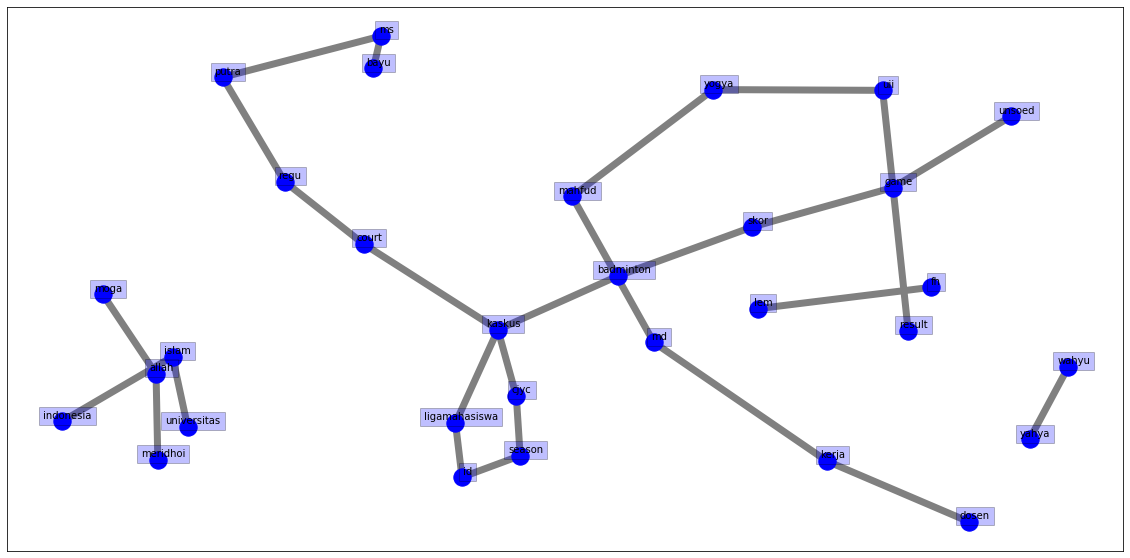

In [130]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [116]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus islam jogja\\uii'

In [122]:
pos_tag[pos_tag.POS=='JJ']

,Word,Weight,POS
0,jakal,20.196544,JJ
1,mas,17.106798,JJ
2,eh,16.269911,JJ
3,salah,10.512565,JJ
4,selamat,8.685938,JJ
5,nyata,8.505489,JJ
6,kaya,8.371769,JJ
7,habis,7.781245,JJ
8,tuh,7.427762,JJ
9,bro,6.002382,JJ
